In [67]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt  # ✅ Correct
import seaborn as sns



In [57]:
class Perceptron:
    def __init__(self, learning_rate = 0.01, epochs = 1000, threshold = 0):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.threshold = threshold
    def activation_func(self,z):
        return 1 if z >=0 else 0
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = [self.activation_func(i) for i in linear_output]
        return np.array(y_predicted)
    def fit(self, X,y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for epoch in range(self.epochs):
            error_count = 0
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                error = y[idx] - y_predicted
                if error != 0:
                    update = self.lr * (y[idx] - y_predicted)
                    self.weights += update * x_i
                    self.bias += update
                    error_count += 1
                    print(f"Epoch {epoch+1}, Sample {idx+1}: Error! Updating...")
                current_preds = self.predict(X)
                current_acc = accuracy_score(y, current_preds)
            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Training Accuracy = {current_acc * 100:.2f}%")

            # STOP CONDITION: Reach at least 75%
            if current_acc >= 0.75:
                print(f"\nTarget Reached! Stopping at Epoch {epoch}")
                print(f"Final Training Accuracy: {current_acc * 100:.2f}%")
                break

In [88]:

class MultilayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.lr = learning_rate

        # Initialize Weights Randomly
        # We cannot use 0 here! If weights are 0, all neurons learn the same thing (Symmetry problem).
        self.w1 = np.random.uniform(-1, 1, (input_size, hidden_size)) # Input -> Hidden
        self.b1 = np.zeros((1, hidden_size))

        self.w2 = np.random.uniform(-1, 1, (hidden_size, output_size)) # Hidden -> Output
        self.b2 = np.zeros((1, output_size))

    # Activation Function (Sigmoid)
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # Derivative of Sigmoid (Used for Backprop)
    # Assumes x has already passed through sigmoid
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def predict(self, X):
        # Forward pass only (used for testing)
        hidden_layer = self.sigmoid(np.dot(X, self.w1) + self.b1)
        output_layer = self.sigmoid(np.dot(hidden_layer, self.w2) + self.b2)
        return output_layer

    def fit(self, X, y, epochs=10000):
        for epoch in range(epochs):

            # --- PHASE 1: FORWARD PASS ---
            # 1. Calculate Hidden Layer
            hidden_input = np.dot(X, self.w1) + self.b1
            hidden_output = self.sigmoid(hidden_input)

            # 2. Calculate Output Layer
            final_input = np.dot(hidden_output, self.w2) + self.b2
            final_output = self.sigmoid(final_input)

            # --- PHASE 2: BACKPROPAGATION (The hard part) ---

            # 1. Calculate Error at Output
            # (Target - Prediction)
            error = y - final_output

            # 2. Calculate Gradient at Output Layer
            # Error * Slope of Sigmoid
            d_output = error * self.sigmoid_derivative(final_output)

            # 3. Calculate Error at Hidden Layer
            # We pull the error backwards from Output through W2
            error_hidden = d_output.dot(self.w2.T)

            # 4. Calculate Gradient at Hidden Layer
            d_hidden = error_hidden * self.sigmoid_derivative(hidden_output)

            # --- PHASE 3: UPDATE WEIGHTS ---
            # Update Hidden -> Output weights
            self.w2 += hidden_output.T.dot(d_output) * self.lr
            self.b2 += np.sum(d_output, axis=0, keepdims=True) * self.lr

            # Update Input -> Hidden weights
            self.w1 += X.T.dot(d_hidden) * self.lr
            self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * self.lr

            # Monitoring
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Error: {np.mean(np.abs(error)):.4f}")

In [108]:
X = np.array([[1,0,0], [1,0,1], [1,1,1], [0,1,1]])
# Targets: 0, 0, 0, 1
y = np.array([1, 1, 1, 0])

# 2. Initialize the Perceptron
p = Perceptron(learning_rate=0.1, epochs=10, threshold=0.5)

# 3. Train
p.fit(X, y)

# 4. Test
print("Weights:", p.weights)
print("Bias:", p.bias)
print("Predictions:", p.predict(X))

Epoch 1, Sample 4: Error! Updating...
Epoch 0: Training Accuracy = 25.00%
Epoch 2, Sample 1: Error! Updating...
Epoch 2, Sample 3: Error! Updating...
Epoch 2, Sample 4: Error! Updating...

Target Reached! Stopping at Epoch 1
Final Training Accuracy: 100.00%
Weights: [ 0.2 -0.1 -0.1]
Bias: 0.0
Predictions: [1 1 1 0]


## Sonar Databse
### Task 2

In [109]:
df = pd.read_csv('./Datasets/sonar.csv', header=None)
print(df.head())
X, y = df.iloc[:, :-1], df.iloc[:,-1]
y = y.map({'M': 1, 'R': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42, shuffle= True)
X_train_np, X_test_np, y_train_np, y_test_np = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()
print(f"Total samples: {len(df)}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

In [110]:
model = Perceptron(learning_rate=0.1, threshold=0.5)
model.fit(X_train_np,y_train_np)

Epoch 1, Sample 1: Error! Updating...
Epoch 1, Sample 2: Error! Updating...
Epoch 1, Sample 7: Error! Updating...
Epoch 1, Sample 10: Error! Updating...
Epoch 1, Sample 11: Error! Updating...
Epoch 1, Sample 15: Error! Updating...
Epoch 1, Sample 17: Error! Updating...
Epoch 1, Sample 18: Error! Updating...
Epoch 1, Sample 19: Error! Updating...
Epoch 1, Sample 20: Error! Updating...
Epoch 1, Sample 25: Error! Updating...
Epoch 1, Sample 31: Error! Updating...
Epoch 1, Sample 33: Error! Updating...
Epoch 1, Sample 34: Error! Updating...
Epoch 1, Sample 36: Error! Updating...
Epoch 1, Sample 38: Error! Updating...
Epoch 1, Sample 39: Error! Updating...
Epoch 1, Sample 40: Error! Updating...
Epoch 1, Sample 41: Error! Updating...
Epoch 1, Sample 42: Error! Updating...
Epoch 1, Sample 45: Error! Updating...
Epoch 1, Sample 48: Error! Updating...
Epoch 1, Sample 50: Error! Updating...
Epoch 1, Sample 52: Error! Updating...
Epoch 1, Sample 53: Error! Updating...
Epoch 1, Sample 54: Error! U

In [111]:
y_pred_test = model.predict(X_test_np)
test_accuracy = accuracy_score(y_test_np, y_pred_test)
print(f"\nTesting Accuracy: {test_accuracy * 100:.2f}%")
# Generate Confusion Matrix



Testing Accuracy: 80.95%


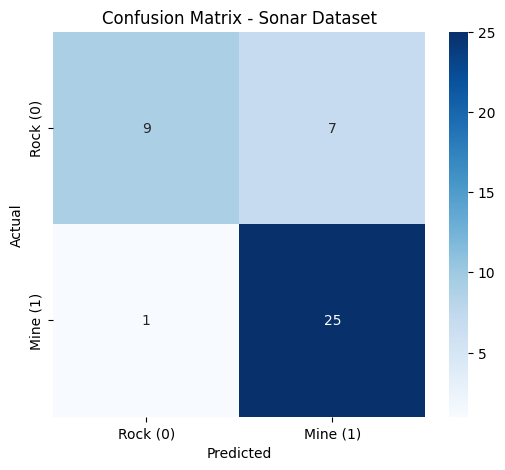

In [112]:
# Generate Confusion Matrix
cm = confusion_matrix(y_test_np, y_pred_test)

# Plotting using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rock (0)', 'Mine (1)'],
            yticklabels=['Rock (0)', 'Mine (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Sonar Dataset')
plt.show()

## IRIS DATABASE
### TASK 3



In [97]:
df = pd.read_csv('./Datasets/Iris.csv')
df = df.drop('Id', axis=1)
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [98]:
unique_species = df.Species.unique()
mapping_encode = {
    species: idx for idx,species in enumerate(unique_species)
}
df.Species = df.Species.map(mapping_encode)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [107]:

model = MultilayerPerceptron(input_size= 4, hidden_size= 8, output_size= 3, learning_rate=0.1)
X,y = df.drop('Species', axis = 1), df.Species
y_encoded = pd.get_dummies(y)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X,y_encoded,test_size= 0.2, random_state= 42, shuffle= True)
X_train_iris_np, X_test_iris_np, y_train_iris_np, y_test_iris_np = X_train_iris.to_numpy(), X_test_iris.to_numpy(), y_train_iris.to_numpy(), y_test_iris.to_numpy()

model.fit(X_train_iris_np,y_train_iris_np, epochs= 10000)
y_predict_iris = model.predict(X_test_iris_np)
pred_classes = np.argmax(y_predict_iris, axis= 1)
true_classes = np.argmax(y_test_iris_np, axis= 1)
test_accuracy = accuracy_score(true_classes, pred_classes)
print(f'The accuracy is {test_accuracy*100:.2f}%')

Epoch 0, Error: 0.5370
Epoch 1000, Error: 0.2308
Epoch 2000, Error: 0.2278
Epoch 3000, Error: 0.2288
Epoch 4000, Error: 0.2299
Epoch 5000, Error: 0.4443
Epoch 6000, Error: 0.2313
Epoch 7000, Error: 0.2311
Epoch 8000, Error: 0.2292
Epoch 9000, Error: 0.2261
The accuracy is 63.33%
